In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly import graph_objects as go
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt

In [52]:

df1 = pd.read_csv('processed datasets/processed_news_data.csv')
df2 = pd.read_csv('processed datasets/processed_Bengali-Drama_Data.csv')
df3 = pd.read_csv('processed datasets/processed_cricket_data.csv')
df4 = pd.read_csv('processed datasets/processed_restaurant_data.csv')
#combine all the dataframes into one
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

df.head()

,text,Tag,sentiment
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,negative,0
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,negative,0
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,negative,0
3,চুরি নয় লুটপাট।,negative,0
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,neutral,2


In [53]:
df.shape

(30531, 3)

In [54]:
#check null values
df.isnull().sum()

text         0
Tag          0
sentiment    0
dtype: int64

### EDA

In [55]:
# Convert sentiment to a categorical type temporarily
df['sentiment'] = df['sentiment'].astype('category')

# Call describe again
df.describe(include='all')

,text,Tag,sentiment
count,30531,30531,30531
unique,28648,3,3
top,ফালতু নাটক,positive,1
freq,100,14011,14011


In [56]:

temp = df.groupby('sentiment').count()['text'].reset_index()


sentiment_mapping = {0: 'negative', 1: 'positive', 2: 'neutral'}
temp['sentiment'] = temp['sentiment'].map(sentiment_mapping)


temp = temp.sort_values(by='sentiment')

temp.style.background_gradient(cmap='Purples')

,sentiment,text
0,negative,13057
1,positive,14011
2,neutral,3463


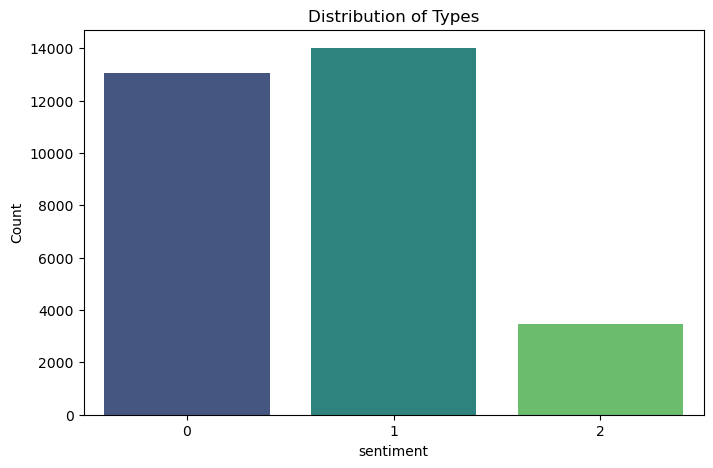

In [57]:

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Types')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

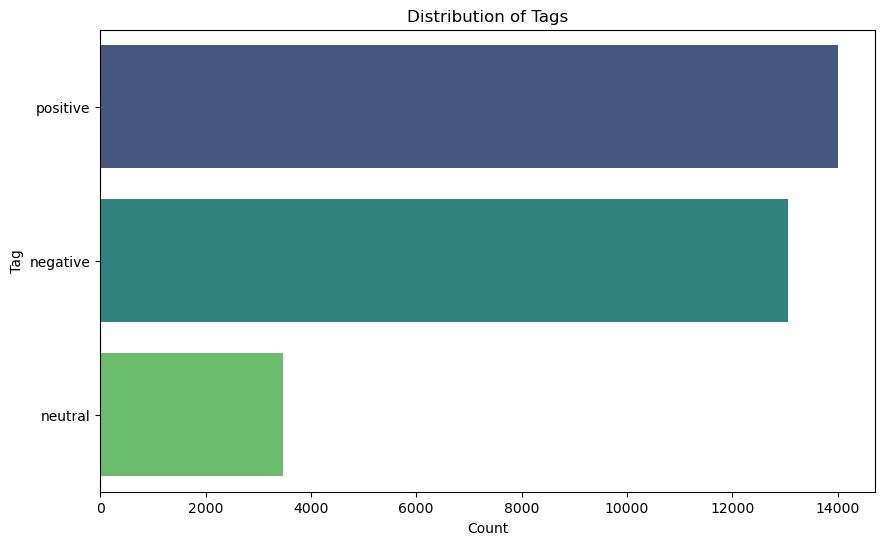

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Tag', data=df, palette='viridis', order=df['Tag'].value_counts().index)
plt.title('Distribution of Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

In [59]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text=temp.sentiment,
    values=temp.text,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))
fig.show()

#### Most common WOrds

In [60]:
from collections import Counter

df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,নাটক,5045
1,না,4185
2,আর,3848
3,এই,3775
4,করে,3361
5,ভালো,3311
6,অনেক,3262
7,কি,2870
8,।,2661
9,একটা,2465


In [61]:
df['temp_list'] = df['text'].apply(lambda x: str(x).split())
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('bengali')]
df['temp_list'] = df['temp_list'].apply(remove_stopword)

In [62]:
# Remove punctuation
def remove_punctuation(temp_list):
    return [re.sub(r'[“”"\'।।.,!?()\[\]{}<>;:।‘’–—…]', '', word) for word in temp_list]

df['temp_list'] = df['temp_list'].apply(remove_punctuation)

#### Most common words after removing stopwords

In [63]:
def remove_space(x):
    return [y for y in x if y != '']
df['temp_list'] = df['temp_list'].apply(remove_space)

In [64]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,নাটক,5856
1,ভালো,3421
2,না,2818
3,একটা,2492
4,অসাধারণ,2002
5,সুন্দর,1943
6,ভাল,1919
7,ভাই,1806
8,কথা,1455
9,টা,1292


#### Most common words Sentiments Wise

In [65]:
df.head(5)

,text,Tag,sentiment,temp_list
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,negative,0,"[লিখার, সময়, পারলে, সত্য, লিখার, অভ্যাস, শিখুন]"
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,negative,0,"[হচ্ছে, সংশ্লিষ্ট, সকলের, ডিপ্রেশনের, ফলে, সরক..."
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,negative,0,"[দেশের, স্বাভাবিক, অর্থনৈতিক, গতিপ্রবাহকে, বাধ..."
3,চুরি নয় লুটপাট।,negative,0,"[চুরি, লুটপাট]"
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,neutral,2,"[ইসলামী, ব্যাংকের, বর্তমান, অবস্থা, শাসক, জামা..."


In [66]:
Positive_sent = df[df['Tag']=='positive']
Negative_sent = df[df['Tag']=='negative']
Neutral_sent = df[df['Tag']=='neutral']

In [67]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Purples')

,Common_words,count
0,নাটক,3994
1,ভালো,2665
2,অসাধারণ,1978
3,সুন্দর,1855
4,একটা,1540
5,ভাল,1365
6,ভাই,1303
7,টা,926
8,ধন্যবাদ,910
9,না,822


In [68]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Greens')

,Common_words,count
0,নাটক,1853
1,না,1594
2,একটা,819
3,টাকা,750
4,ফালতু,737
5,কথা,680
6,ভালো,615
7,হয়ে,613
8,দিয়ে,595
9,যায়,511


In [69]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,টাকা,225
2,হবে,207
3,কথা,197
4,দেশের,185
5,হয়ে,175
6,দিয়ে,148
7,যায়,145
8,সাথে,143
9,ভালো,141
10,হয়েছে,138


### Look at Unique Words in each Segment

In [70]:
raw_text = [word for word_list in df['temp_list'] for word in word_list]

In [71]:
def words_unique(Tag, numwords, raw_words):
    allother = []
    for item in df[df.Tag != Tag]['temp_list']:
        for word in item:
            allother.append(word)
    allother = list(set(allother))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in df[df.Tag == Tag]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns=['words', 'count'])
    
    return Unique_words

#### Positive

In [72]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,আরিয়ান,275
1,মিজানুর,142
2,বৃন্দাবন,77
3,শাহনাজ,46
4,আরিয়ান,41
5,ছুঁয়ে,32
6,নামাযের,31
7,nice,29
8,নিসো,29
9,nisho,27


#### Negative unique

In [73]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,করিমের,56
1,সালা,45
2,কাচ্চি,25
3,পালতু,24
4,এমবি,21
5,কুকুর,19
6,পোলারা,19
7,আরকি,18
8,মাগির,18
9,শালার,17


#### Neutral Unique

In [74]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Purples')

The top 10 unique words in Neutral Tweets are:


,words,count
0,বরখেলাপ,6
1,পাল্টানোর,5
2,এসিস্ট,5
3,আইপিএলে,5
4,মুর্তজা,5
5,এলিট,4
6,মাস্টার্স,4
7,গার্মেণ্টস,4
8,দোভাষী,4
9,গণিতে,4
